In [3]:
## pip install python-csv
import csv

## Write lists to CSV file.
## Writer Options:
##    delimeter           the items separate character
##    lineterminator      the line separate character
##    skipinitialspace    skip all the leading spaces after a delimiter 
ids = [500, 666, 123, 7]
names = ["John", "Jack", "Joe", "Jame"]
gpas = [1.8, 4.0, 3.8, 1.2]
with open('tmp/test.csv', 'wt') as f:
    wt = csv.writer(f, lineterminator='\n')
    wt.writerow( ('id', 'name', 'gpa') )
    for i, n, g in zip(ids, names, gpas):
        wt.writerow( (i, n, g) )
    wt.writerow( (None, 'Average', '=AVERAGE(C2:C5)') )

In [11]:
## Write dict to CSV file.
fields= ["id", "name", "gpa"]
students = [ {"id": 500, "name": "John Rambo", "gpa": 1.8},
        	 { "id": 666, "name": "Jack Ripper", "gpa": 4.0},
        	 { "id": 123, "name": "Joe Green", "gpa": 3.8},
        	 { "id": 7, "name": "Jame Bond", "gpa": 1.2} ]
with open('tmp/test.csv', 'w') as fp:
    wt = csv.DictWriter(fp, fieldnames=fields, lineterminator='\n')
    wt.writeheader()
    wt.writerows(students)

In [14]:
## Read CSV file as lists
with open('tmp/test.csv') as fp:
    rd = csv.reader(fp)
    header = next(rd)    ## Read header as a list.
    print(header[0], header[1], header[2])
    for row in rd:
        print(row[0], row[1], row[2])

id name gpa
500 John Rambo 1.8
666 Jack Ripper 4.0
123 Joe Green 3.8
7 Jame Bond 1.2


In [16]:
## Read CSV file as dict.
with open('tmp/test.csv') as fp:
    for r in csv.DictReader(fp):
        print(r['id'], r['name'], r['gpa'])

500 John Rambo 1.8
666 Jack Ripper 4.0
123 Joe Green 3.8
7 Jame Bond 1.2


### Example

In [20]:
## Ex. Student Grade
## Score policy: Homework 10 to 10%, midterm 100 to 40% and final 100 to 50%.
def total(hw, mid, fin):
    return float(hw) + float(mid) * 0.4 + float(fin) * 0.5
def to_grade(t):
    return 'A' if t >= 90 else 'B' if t >= 80 else 'C' \
        if t >= 70 else 'D' if t >= 60 else 'F'

grades = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'F': 0 }
with open('files/students.csv') as fp:
    for row in csv.DictReader(fp):
        g = to_grade(total(row['hw'], row['mid'], row['fin']))
        print('%s:\t%s' % (row['name'], g))
        grades[g] += 1
## Frequency count
for g in ['A', 'B', 'C', 'D', 'F']:
    print('%s: %d' % (g, grades[g]), end='  ')

John Rambo:	C
Jack Ripper:	A
Joe Green:	B
Jame Bond:	D
Jet Ready:	D
Janet Long:	C
Jessie Howdy:	F
Jim Morrison:	C
Judy Anne:	B
Jude Zebra:	C
A: 1  B: 2  C: 4  D: 2  F: 1  

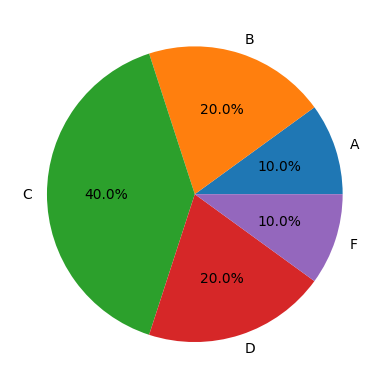

In [30]:
## Pi Plot
import matplotlib.pyplot as pl
with open('files/students.csv') as fp:
    c = 0
    for row in csv.DictReader(fp):
        g = to_grade(total(row['hw'], row['mid'], row['fin']))
        grades[g] += 1
        c += 1
data = [ grades[i]*100/c for i in grades]
pl.pie(data, autopct='%1.1f%%', labels=('A', 'B', 'C', 'D', 'F'))
pl.show()

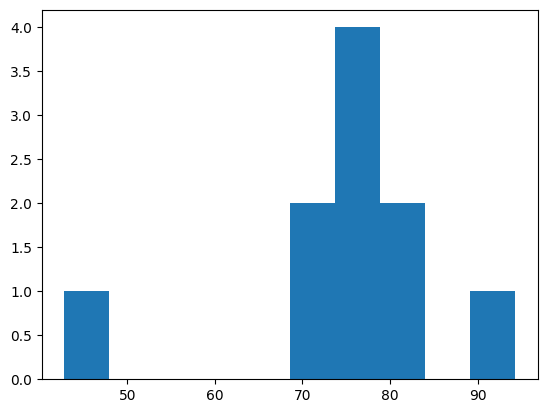

In [29]:
## Histogram
with open('files/students.csv') as fp:
    tt = [total(row['hw'], row['mid'], row['fin'])  for row in csv.DictReader(fp) ]
pl.hist(tt)   ## Try: Bar plot    pl.bar(range(len(tt)), tt)
pl.show()

In [31]:
## Student statistics.
import numpy as np
def read_totals(file):
    totals = []
    with open(file) as fp:
        for row in  csv.DictReader(fp):
            totals.append(total(row['hw'], row['mid'], row['fin']))
    return np.array(totals, dtype=np.float32)

totals = read_totals('files/students.csv')
print('Number of students: %d' % totals.size)
print('Min: %1.2f  Max: %1.2f' % (totals.min(), totals.max()))
print('Mean: %1.2f' % totals.mean())
print('Sd: %1.2f' % totals.std())

Number of students: 10
Min: 42.80  Max: 94.30
Mean: 74.97
Sd: 12.66
